In [2]:
import tweepy
from textblob import TextBlob
import numpy as np
import os

In [3]:
def conv(tweet_date):
    return tweet_date.year*365 + tweet_date.month*30 + tweet_date.day

def conv_my(tweet_date):
    return tweet_date[0]*365 + tweet_date[1]*30 + tweet_date[2]

def filter_by_date(list_of_tweets, start_date, end_date):
    filtered_tweets = [] 
    for tweet in list_of_tweets:
        if (conv(tweet.created_at) >= conv_my(start_date)) and (conv(tweet.created_at) <= conv_my(end_date)):
            filtered_tweets.append(tweet)
    return filtered_tweets

In [4]:
def get_searched_tweets_unique(query, max_tweets, start_date, end_date):
    searched_tweets = []
    last_id = -1
    k = 0
    while len(searched_tweets) < max_tweets:
        count = max_tweets - len(searched_tweets)
        try:
            new_tweets = api.search(q=query, count=count, max_id=str(last_id - 1))
            if not new_tweets:
                break
            searched_tweets.extend(new_tweets)
            searched_tweets = np.unique(searched_tweets).tolist()
            searched_tweets = filter_by_date(searched_tweets, start_date, end_date)
            last_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            # depending on TweepError.code, one may want to retry or wait
            # to keep things simple, we will give up on an error
            break
        k+=1
    return searched_tweets

In [ ]:
# Step 1 - Authenticate
#we want to create four variables that authenticating Twitter will require. It can be find in the dashboard and we can copy and paste them as strings.
#this requires signing in to Twitter Application Management

consumer_key = ''
consumer_secret =''

access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) #log in via code to twitter application management, using the consumer arguments
auth.set_access_token(access_token, access_token_secret) #this calls set access token method on the auth variable which takes the arguments if the token.

#from this variable we do all the tweet magic. It needs only the autentication variable auth
api = tweepy.API(auth) 

#Step 2 - Retrieve Tweets
string = 'Lemonade'

#public_tweets = api.search(string) #stores a list of tweets containing this string.

max_tweets = 1000
start_date, end_date = [2020, 7, 23], [2020, 7, 29]

public_tweets = get_searched_tweets_unique(string, max_tweets, start_date, end_date)

#print(public_tweets)
polarity_of_tweet=0
for tweet in public_tweets:
    #Step 3 Perform Sentiment Analysis on Tweets
    analysis = TextBlob(tweet.text)
    polarity_of_tweet += analysis.sentiment.polarity
    #print(tweet.text)
    #print('---------- ')
    
print('Average polarity of: ' + string + ' is {0:.2f}'.format(polarity_of_tweet/len(public_tweets)))

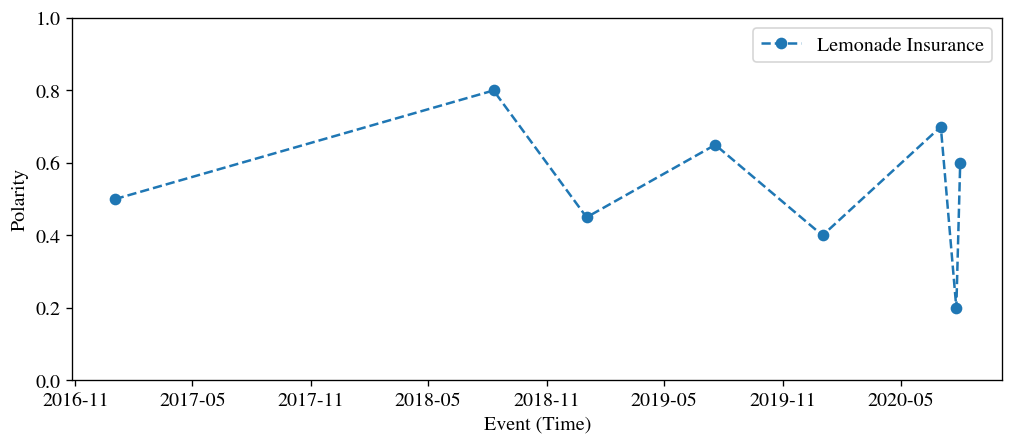

In [9]:
import datetime
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = '12'
matplotlib.rcParams['figure.figsize'] = [10., 4.]
matplotlib.rcParams['figure.dpi'] = 120

X1 = np.array(
    [[datetime.datetime(2017,  1,  1, 0, 0, 0)], ### Just some reference point in between  
     [datetime.datetime(2018,  8, 10, 0, 0, 0)], ### Lemonades Giveback Grows 3X in 2018
     [datetime.datetime(2019,  1,  1, 0, 0, 0)], ### Just some reference point in between     
     [datetime.datetime(2019,  7, 19, 0, 0, 0)], ### Lemonade donates $631K to 25 charities worldwide
     [datetime.datetime(2020,  1,  1, 0, 0, 0)], ### Just some reference point in between     
     [datetime.datetime(2020,  7,  2, 0, 0, 0)], ### Lemonade fills IPO Jul 2, 2020
     [datetime.datetime(2020,  7, 26, 0, 0, 0)], ### Goldman Sachs drops a bombshell on Lemonade
     [datetime.datetime(2020,  8,  1, 0, 0, 0)]]) ###Today

Y1 = get_tweets_from_public_tweets(public_tweets)

plt.plot(X1, Y1,'--o')
plt.legend(['Lemonade Insurance'])
plt.xlabel('Event (Time)')
plt.ylabel('Polarity')
plt.ylim([0,1])
plt.yticks(np.arange(0,1.2,0.2))
plt.show()